<center><h1>第十章 时序数据</h1></center>

In [1]:
import numpy as np
import pandas as pd

## 一、时序中的基本对象

时间序列的概念在日常生活中十分常见，但对于一个具体的时序事件而言，可以从多个时间对象的角度来描述。例如2020年9月7日周一早上8点整需要到教室上课，这个课会在当天早上10点结束，其中包含了哪些时间概念？

* 第一，会出现时间戳（Date times）的概念，即'2020-9-7 08:00:00'和'2020-9-7 10:00:00'这两个时间点分别代表了上课和下课的时刻，在`pandas`中称为`Timestamp`。同时，一系列的时间戳可以组成`DatetimeIndex`，而将它放到`Series`中后，`Series`的类型就变为了`datetime64[ns]`，如果有涉及时区则为`datetime64[ns, tz]`，其中tz是timezone的简写。

* 第二，会出现时间差（Time deltas）的概念，即上课需要的时间，两个`Timestamp`做差就得到了时间差，pandas中利用`Timedelta`来表示。类似的，一系列的时间差就组成了`TimedeltaIndex`， 而将它放到`Series`中后，`Series`的类型就变为了`timedelta64[ns]`。

* 第三，会出现时间段（Time spans）的概念，即在8点到10点这个区间都会持续地在上课，在`pandas`利用`Period`来表示。类似的，一系列的时间段就组成了`PeriodIndex`， 而将它放到`Series`中后，`Series`的类型就变为了`Period`。

* 第四，会出现日期偏置（Date offsets）的概念，假设你只知道9月的第一个周一早上8点要去上课，但不知道具体的日期，那么就需要一个类型来处理此类需求。再例如，想要知道2020年9月7日后的第30个工作日是哪一天，那么时间差就解决不了你的问题，从而`pandas`中的`DateOffset`就出现了。同时，`pandas`中没有为一列时间偏置专门设计存储类型，理由也很简单，因为需求比较奇怪，一般来说我们只需要对一批时间特征做一个统一的特殊日期偏置。

通过这个简单的例子，就能够容易地总结出官方文档中的这个[表格](https://pandas.pydata.org/docs/user_guide/timeseries.html#overview)：

|概念 |                          单元素类型              |    数组类型         |                pandas数据类型|
|:---------|:----------|:-----------|:------------|
|Date times           |           `Timestamp`       |       `DatetimeIndex`  |   `datetime64[ns]`|
|Time deltas          |           `Timedelta`        |      `TimedeltaIndex` |  `timedelta64[ns]`|
|Time spans            |          `Period`           |      `PeriodIndex`   |    `period[freq]`|
|Date offsets          |          `DateOffset`         |    `None`          |    `None`|

由于时间段对象`Period/PeriodIndex`的使用频率并不高，因此将不进行讲解，而只涉及时间戳序列、时间差序列和日期偏置的相关内容。

## 二、时间戳
### 1. Timestamp的构造与属性

- 单个时间戳的生成利用`pd.Timestamp`实现，一般而言的常见日期格式都能被成功地转换：


In [4]:
ts = pd.Timestamp('2020/1/1')#T要大写
ts

Timestamp('2020-01-01 00:00:00')

In [5]:
ts = pd.Timestamp('2020-1-1 08:10:30')
ts

Timestamp('2020-01-01 08:10:30')

- 通过`year, month, day, hour, min, second`可以获取具体的数值：

In [6]:
ts.year

2020

In [7]:
ts.month

1

In [8]:
ts.day

1

In [9]:
ts.hour

8

In [10]:
ts.minute

10

In [11]:
ts.second

30

在`pandas`中，时间戳的最小精度为纳秒`ns`，由于使用了64位存储，可以表示的时间范围大约可以如下计算：
$$\rm Time\,Range = \frac{2^{64}}{10^9\times 60\times 60\times 24\times 365} \approx 585 (Years)$$
通过`pd.Timestamp.max`和`pd.Timestamp.min`可以获取时间戳表示的范围，可以看到确实表示的区间年数大小正如上述计算结果：

In [12]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [13]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [14]:
pd.Timestamp.max.year - pd.Timestamp.min.year

585

### 2. Datetime序列的生成

一组时间戳可以组成时间序列，可以用`to_datetime`和`date_range`来生成。其中，`to_datetime`能够把一列时间戳格式的对象转换成为`datetime64[ns]`类型的时间序列：

- pd.to_datetime

In [19]:
pd.to_datetime(['2020-1-1 08:00:00', '2020-1-3', '2020-1-6'])#时间戳形式yyyy-mm-dd hh:mm:ss

DatetimeIndex(['2020-01-01 08:00:00', '2020-01-03 00:00:00',
               '2020-01-06 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [20]:
df = pd.read_csv('C:\datawhale\joyful-pandas-master\data\learn_pandas.csv')
s = pd.to_datetime(df.Test_Date)
s.head()

0   2019-10-05
1   2019-09-04
2   2019-09-12
3   2020-01-03
4   2019-11-06
Name: Test_Date, dtype: datetime64[ns]

在极少数情况，时间戳的格式不满足转换时，可以强制使用`format`进行匹配：

In [21]:
temp = pd.to_datetime(['2020\\1\\1','2020\\1\\3'],format='%Y\\%m\\%d')#设定格式
temp

DatetimeIndex(['2020-01-01', '2020-01-03'], dtype='datetime64[ns]', freq=None)

注意上面由于传入的是列表，而非`pandas`内部的`Series`，因此返回的是`DatetimeIndex`，如果想要转为`datetime64[ns]`的序列，需要显式用`Series`转化：

In [22]:
pd.Series(temp).head()#index转化成序列

0   2020-01-01
1   2020-01-03
dtype: datetime64[ns]

另外，还存在一种把表的多列时间属性拼接转为时间序列的`to_datetime`操作，此时的列名必须和以下给定的时间关键词列名一致：

In [23]:
df_date_cols = pd.DataFrame({'year': [2020, 2020],
                             'month': [1, 1],
                             'day': [1, 2],
                             'hour': [10, 20],
                             'minute': [30, 50],
                             'second': [20, 40]})
pd.to_datetime(df_date_cols)

0   2020-01-01 10:30:20
1   2020-01-02 20:50:40
dtype: datetime64[ns]

`date_range`是一种生成连续间隔时间的一种方法，其重要的参数为`start, end, freq, periods`，它们分别表示开始时间，结束时间，时间间隔，时间戳个数。其中，四个中的三个参数决定了，那么剩下的一个就随之确定了。这里要注意，开始或结束日期如果作为端点则它会被包含：

- pd.date_range

In [24]:
pd.date_range('2020-1-1','2020-1-21', freq='10D') # 包含,频率是10day

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21'], dtype='datetime64[ns]', freq='10D')

In [26]:
pd.date_range('2020-1-1','2020-2-28', freq='10D')#不包含结束端点

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21', '2020-01-31',
               '2020-02-10', '2020-02-20'],
              dtype='datetime64[ns]', freq='10D')

In [27]:
pd.date_range('2020-1-1', '2020-2-28', periods=6) # 由于结束日期无法取到，freq不为10天

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-12 14:24:00',
               '2020-01-24 04:48:00', '2020-02-04 19:12:00',
               '2020-02-16 09:36:00', '2020-02-28 00:00:00'],
              dtype='datetime64[ns]', freq=None)

#### 【练一练】
`Timestamp`上定义了一个`value`属性，其返回的整数值代表了从1970年1月1日零点到给定时间戳相差的纳秒数，请利用这个属性构造一个随机生成给定日期区间内日期序列的函数。

In [84]:
def my_datetime(s1,s2,n):#n表示size
    t1=pd.Timestamp(s1).value
    t2=pd.Timestamp(s2).value
    np.random.seed(0)
    res=pd.to_datetime(np.random.rand(n)*(t2-t1)+t1)
    return res

my_datetime('2010/1/1','2010/2/1',3)

DatetimeIndex(['2010-01-18 00:19:02.088919040',
               '2010-01-23 04:06:03.198891776',
               '2010-01-19 16:27:21.426470400'],
              dtype='datetime64[ns]', freq=None)

#### 【end】

最后，要介绍一种改变序列采样频率的方法`asfreq`，它能够根据给定的`freq`对序列进行类似于`reindex`的操作：

In [85]:
s = pd.Series(np.random.rand(5), index=pd.to_datetime(['2020-1-%d'%i for i in range(1,10,2)]))
s.head()

2020-01-01    0.544883
2020-01-03    0.423655
2020-01-05    0.645894
2020-01-07    0.437587
2020-01-09    0.891773
dtype: float64

In [89]:
s.asfreq('D').head()#按一天的频率取样

2020-01-01    0.544883
2020-01-02         NaN
2020-01-03    0.423655
2020-01-04         NaN
2020-01-05    0.645894
Freq: D, dtype: float64

In [90]:
s.asfreq('12H').head()

2020-01-01 00:00:00    0.544883
2020-01-01 12:00:00         NaN
2020-01-02 00:00:00         NaN
2020-01-02 12:00:00         NaN
2020-01-03 00:00:00    0.423655
Freq: 12H, dtype: float64


前面提到了`datetime64[ns]`本质上可以理解为一个大整数，对于一个该类型的序列，可以使用`max, min, mean`，来取得最大时间戳、最小时间戳和“平均”时间戳。

### 3. dt对象

如同`category, string`的序列上定义了`cat, str`来完成分类数据和文本数据的操作，在时序类型的序列上定义了`dt`对象来完成许多时间序列的相关操作。这里对于`datetime64[ns]`类型而言，可以大致分为三类操作：取出时间相关的属性、判断时间戳是否满足条件、取整操作。

第一类操作的常用属性包括：`date, time, year, month, day, hour, minute, second, microsecond, nanosecond, dayofweek, dayofyear, weekofyear, daysinmonth, quarter`，其中`daysinmonth, quarter`分别表示月中的第几天和季度。

In [96]:
s = pd.Series(pd.date_range('2020-1-1','2020-1-3', freq='D'))
s.dt.date#s是datetime64【ns】类型，这样是obj类型

0    2020-01-01
1    2020-01-02
2    2020-01-03
dtype: object

In [97]:
s.dt.time

0    00:00:00
1    00:00:00
2    00:00:00
dtype: object

In [98]:
s.dt.day

0    1
1    2
2    3
dtype: int64

In [110]:
s.dt.daysinmonth#表示这天所在月的总天数

0    31
1    31
2    31
dtype: int64

In [112]:
s.dt.quarter#这个时间戳所在的季度

0    1
1    1
2    1
dtype: int64

在这些属性中，经常使用的是`dayofweek`，它返回了周中的星期情况，周一为0、周二为1，以此类推：

In [100]:
s.dt.dayofweek

0    2
1    3
2    4
dtype: int64

此外，可以通过`month_name, day_name`返回英文的月名和星期名，注意它们是方法而不是属性：

In [101]:
s.dt.month_name()

0    January
1    January
2    January
dtype: object

In [102]:
s.dt.day_name()

0    Wednesday
1     Thursday
2       Friday
dtype: object

第二类判断操作主要用于测试是否为月/季/年的第一天或者最后一天：

In [103]:
s.dt.is_year_start # 还可选 is_quarter/month_start

0     True
1    False
2    False
dtype: bool

In [104]:
s.dt.is_year_end # 还可选 is_quarter/month_end

0    False
1    False
2    False
dtype: bool

第三类的取整操作包含`round, ceil, floor`，它们的公共参数为`freq`，常用的包括`H, min, S`（小时、分钟、秒），所有可选的`freq`可参考[此处](https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases>)。

In [105]:
s = pd.Series(pd.date_range('2020-1-1 20:35:00', '2020-1-1 22:35:00', freq='45min'))
s

0   2020-01-01 20:35:00
1   2020-01-01 21:20:00
2   2020-01-01 22:05:00
dtype: datetime64[ns]

In [107]:
s.dt.round('1H')

0   2020-01-01 21:00:00
1   2020-01-01 21:00:00
2   2020-01-01 22:00:00
dtype: datetime64[ns]

In [34]:
s.dt.ceil('1H')

0   2020-01-01 21:00:00
1   2020-01-01 22:00:00
2   2020-01-01 23:00:00
dtype: datetime64[ns]

In [108]:
s.dt.floor('1H')

0   2020-01-01 20:00:00
1   2020-01-01 21:00:00
2   2020-01-01 22:00:00
dtype: datetime64[ns]

### 4. 时间戳的切片与索引

一般而言，时间戳序列作为索引使用。如果想要选出某个子时间戳序列，第一类方法是利用`dt`对象和布尔条件联合使用，另一种方式是利用切片，后者常用于连续时间戳。下面，举一些例子说明：

In [116]:
s = pd.Series(np.random.randint(2,size=366), index=pd.date_range('2020-01-01','2020-12-31',freq='D'))
idx = pd.Series(s.index).dt
s.head()

2020-01-01    0
2020-01-02    0
2020-01-03    0
2020-01-04    0
2020-01-05    1
Freq: D, dtype: int32

Example1：每月的第一天或者最后一天

In [122]:
s[(idx.is_month_start|idx.is_month_end).values].head()#(idx.is_month_start|idx.is_month_end)是一个布尔序列，取出values是是一个数组array

2020-01-01    0
2020-01-31    1
2020-02-01    1
2020-02-29    0
2020-03-01    0
dtype: int32

Example2：双休日

In [123]:
s[idx.dayofweek.isin([5,6]).values].head()

2020-01-04    0
2020-01-05    1
2020-01-11    1
2020-01-12    0
2020-01-18    0
dtype: int32

Example3：取出单日值

In [124]:
s['2020-01-01']

0

In [125]:
s['20200101'] # 自动转换标准格式

0

Example4：取出七月

In [126]:
s['2020-07'].head()

2020-07-01    0
2020-07-02    0
2020-07-03    1
2020-07-04    1
2020-07-05    0
Freq: D, dtype: int32

Example5：取出5月初至7月15日

In [128]:
s['2020-05':'2020-7-15'].head()

2020-05-01    1
2020-05-02    0
2020-05-03    0
2020-05-04    1
2020-05-05    1
Freq: D, dtype: int32

In [129]:
s['2020-05':'2020-7-15'].tail()

2020-07-11    1
2020-07-12    0
2020-07-13    1
2020-07-14    1
2020-07-15    1
Freq: D, dtype: int32

## 三、时间差
### 1. Timedelta的生成

正如在第一节中所说，时间差可以理解为两个时间戳的差，这里也可以通过`pd.Timedelta`来构造：

In [130]:
pd.Timestamp('20200102 08:00:00')-pd.Timestamp('20200101 07:35:00')

Timedelta('1 days 00:25:00')

In [131]:
pd.Timedelta(days=1, minutes=25) # 需要注意加s

Timedelta('1 days 00:25:00')

In [132]:
pd.Timedelta('1 days 25 minutes') # 字符串生成

Timedelta('1 days 00:25:00')

生成时间差序列的主要方式是`pd.to_timedelta`，其类型为`timedelta64[ns]`：

In [134]:
df.head(3)

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22


In [135]:
s = pd.to_timedelta(df.Time_Record)
s.head()

0   0 days 00:04:34
1   0 days 00:04:20
2   0 days 00:05:22
3   0 days 00:04:08
4   0 days 00:05:22
Name: Time_Record, dtype: timedelta64[ns]

与`date_range`一样，时间差序列也可以用`timedelta_range`来生成，它们两者具有一致的参数：

In [136]:
pd.timedelta_range('0s', '1000s', freq='6min')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:06:00', '0 days 00:12:00'], dtype='timedelta64[ns]', freq='6T')

In [137]:
pd.timedelta_range('0s', '1000s', periods=3)

TimedeltaIndex(['0 days 00:00:00', '0 days 00:08:20', '0 days 00:16:40'], dtype='timedelta64[ns]', freq=None)

对于`Timedelta`序列，同样也定义了`dt`对象，上面主要定义了的属性包括`days, seconds, mircroseconds, nanoseconds`，它们分别返回了对应的时间差特征。需要注意的是，这里的`seconds`不是指单纯的秒，而是对天数取余后剩余的秒数：

In [138]:
s.dt.seconds.head()

0    274
1    260
2    322
3    248
4    322
Name: Time_Record, dtype: int64

如果不想对天数取余而直接对应秒数，可以使用`total_seconds`

In [139]:
s.dt.total_seconds().head()

0    274.0
1    260.0
2    322.0
3    248.0
4    322.0
Name: Time_Record, dtype: float64

与时间戳序列类似，取整函数也是可以在`dt`对象上使用的：

In [52]:
pd.to_timedelta(df.Time_Record).dt.round('min').head()

0   0 days 00:05:00
1   0 days 00:04:00
2   0 days 00:05:00
3   0 days 00:04:00
4   0 days 00:05:00
Name: Time_Record, dtype: timedelta64[ns]

### 2. Timedelta的运算

时间差支持的常用运算有三类：与标量的乘法运算、与时间戳的加减法运算、与时间差的加减法与除法运算：

In [140]:
td1 = pd.Timedelta(days=1)
td2 = pd.Timedelta(days=3)
ts = pd.Timestamp('20200101')
td1 * 2

Timedelta('2 days 00:00:00')

In [141]:
td2 - td1

Timedelta('2 days 00:00:00')

In [142]:
ts + td1

Timestamp('2020-01-02 00:00:00')

In [143]:
ts - td1

Timestamp('2019-12-31 00:00:00')

这些运算都可以移植到时间差的序列上：

In [152]:
td1 = pd.timedelta_range(start='1 days', periods=5)
td2 = pd.timedelta_range(start='12 hours', freq='2H', periods=5)
ts = pd.date_range('20200101', '20200105')#默认频率为一天
td1*5

TimedeltaIndex(['5 days', '10 days', '15 days', '20 days', '25 days'], dtype='timedelta64[ns]', freq='5D')

In [147]:
td1 * pd.Series(list(range(5))) # 逐个相乘01234

0    0 days
1    2 days
2    6 days
3   12 days
4   20 days
dtype: timedelta64[ns]

In [148]:
td1 - td2

TimedeltaIndex(['0 days 12:00:00', '1 days 10:00:00', '2 days 08:00:00',
                '3 days 06:00:00', '4 days 04:00:00'],
               dtype='timedelta64[ns]', freq=None)

In [149]:
td1 + pd.Timestamp('20200101')

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
               '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [151]:
ts

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05'],
              dtype='datetime64[ns]', freq='D')

In [153]:
td1 + ts # 逐个相加

DatetimeIndex(['2020-01-02', '2020-01-04', '2020-01-06', '2020-01-08',
               '2020-01-10'],
              dtype='datetime64[ns]', freq=None)

## 四、日期偏置
### 1. Offset对象

日期偏置是一种和日历相关的特殊时间差，例如回到第一节中的两个问题：如何求2020年9月第一个周一的日期，以及如何求2020年9月7日后的第30个工作日是哪一天。

In [161]:
pd.offsets.WeekOfMonth(week=0,weekday=0)

<WeekOfMonth: week=0, weekday=0>

In [194]:
pd.Timestamp('20200831') + pd.offsets.WeekOfMonth(week=0,weekday=0)#下一月第一个周一

Timestamp('2020-09-07 00:00:00')

In [177]:
pd.Timestamp('20200907') + pd.offsets.BDay(30)#30个工作日之后

Timestamp('2020-10-19 00:00:00')

从上面的例子中可以看到，`Offset`对象在`pd.offsets`中被定义。当使用`+`时获取离其最近的下一个日期，当使用`-`时获取离其最近的上一个日期：

In [178]:
pd.Timestamp('20200831') - pd.offsets.WeekOfMonth(week=0,weekday=0)

Timestamp('2020-08-03 00:00:00')

In [179]:
pd.Timestamp('20200907') - pd.offsets.BDay(30)

Timestamp('2020-07-27 00:00:00')

In [180]:
pd.Timestamp('20200907') + pd.offsets.MonthEnd()#这个月末那天

Timestamp('2020-09-30 00:00:00')

常用的日期偏置如下可以查阅这里的[文档](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects)描述。在文档罗列的`Offset`中，需要介绍一个特殊的`Offset`对象`CDay`，其中的`holidays, weekmask`参数能够分别对自定义的日期和星期进行过滤，前者传入了需要过滤的日期列表，后者传入的是三个字母的星期缩写构成的星期字符串，其作用是只保留字符串中出现的星期：

In [181]:
my_filter = pd.offsets.CDay(n=1,weekmask='Wed Fri',holidays=['20200109'])
dr = pd.date_range('20200108', '20200111')
dr.to_series().dt.dayofweek

2020-01-08    2
2020-01-09    3
2020-01-10    4
2020-01-11    5
Freq: D, dtype: int64

In [182]:
[i + my_filter for i in dr]#下一个周三或者周五或者假日

[Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-01-15 00:00:00')]

上面的例子中，`n`表示增加一天`CDay`，`dr`中的第一天为`20200108`，但由于下一天`20200109`被排除了，并且`20200110`是合法的周五，因此转为`20200110`，其他后面的日期处理类似。
#### 【CAUTION】不要使用部分`Offset`
在当前版本下由于一些 ``bug`` ，不要使用 ``Day`` 级别以下的 ``Offset`` 对象，比如 ``Hour, Second`` 等，请使用对应的 ``Timedelta`` 对象来代替。
#### 【END】
### 2. 偏置字符串

前面提到了关于`date_range`的`freq`取值可用`Offset`对象，同时在`pandas`中几乎每一个`Offset`对象绑定了日期偏置字符串（`frequencies strings/offset aliases`），可以指定`Offset`对应的字符串来替代使用。下面举一些常见的例子。

In [183]:
pd.date_range('20200101','20200331', freq='MS') # 月初

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01'], dtype='datetime64[ns]', freq='MS')

In [184]:
pd.date_range('20200101','20200331', freq='M') # 月末

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31'], dtype='datetime64[ns]', freq='M')

In [185]:
pd.date_range('20200101','20200110', freq='B') # 工作日

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='B')

In [186]:
pd.date_range('20200101','20200201', freq='W-MON') # 周一

DatetimeIndex(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27'], dtype='datetime64[ns]', freq='W-MON')

In [187]:
pd.date_range('20200101','20200201', freq='WOM-1MON') # 每月第一个周一

DatetimeIndex(['2020-01-06'], dtype='datetime64[ns]', freq='WOM-1MON')

上面的这些字符串，等价于使用如下的`Offset`对象：

In [188]:
pd.date_range('20200101','20200331', freq=pd.offsets.MonthBegin())#月初

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01'], dtype='datetime64[ns]', freq='MS')

In [189]:
pd.date_range('20200101','20200331', freq=pd.offsets.MonthEnd())#月末

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31'], dtype='datetime64[ns]', freq='M')

In [190]:
pd.date_range('20200101','20200110', freq=pd.offsets.BDay())#工作日

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='B')

In [191]:
pd.date_range('20200101','20200201', freq=pd.offsets.CDay(weekmask='Mon'))#周一

DatetimeIndex(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27'], dtype='datetime64[ns]', freq='C')

In [193]:
pd.date_range('20200101','20200301', freq=pd.offsets.WeekOfMonth(week=0,weekday=0))#每个月第一个周一

DatetimeIndex(['2020-01-06', '2020-02-03'], dtype='datetime64[ns]', freq='WOM-1MON')

#### 【CAUTION】关于时区问题的说明
各类时间对象的开发，除了使用`python`内置的`datetime`模块，`pandas`还利用了`dateutil`模块，很大一部分是为了处理时区问题。总所周知，我国是没有夏令时调整时间一说的，但有些国家会有这种做法，导致了相对而言一天里可能会有23/24/25个小时，也就是`relativedelta`，这使得`Offset`对象和`Timedelta`对象有了对同一问题处理产生不同结果的现象，其中的规则也较为复杂，官方文档的写法存在部分描述错误，并且难以对描述做出统一修正，因为牵涉到了`Offset`相关的很多组件。因此，本教程完全不考虑时区处理，如果对时区处理的时间偏置有兴趣了解讨论，可以联系我或者参见[这里](https://github.com/pandas-dev/pandas/pull/36516)的讨论。
#### 【END】
## 五、时序中的滑窗与分组
### 1. 滑动窗口

所谓时序的滑窗函数，即把滑动窗口用`freq`关键词代替，下面给出一个具体的应用案例：在股票市场中有一个指标为`BOLL`指标，它由中轨线、上轨线、下轨线这三根线构成，具体的计算方法分别是`N`日均值线、`N`日均值加两倍`N`日标准差线、`N`日均值减两倍`N`日标准差线。利用`rolling`对象计算`N=30`的`BOLL`指标可以如下写出：

In [195]:
import matplotlib.pyplot as plt
idx = pd.date_range('20200101', '20201231', freq='B')#工作日
np.random.seed(2020)
data = np.random.randint(-1,2,len(idx)).cumsum() # 随机游动构造模拟序列
s = pd.Series(data,index=idx)
s.head()

2020-01-01   -1
2020-01-02   -2
2020-01-03   -1
2020-01-06   -1
2020-01-07   -2
Freq: B, dtype: int32

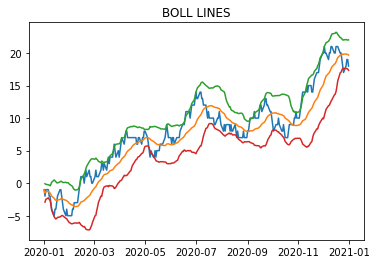

In [196]:
r = s.rolling('30D')#30天的滑动窗口
plt.plot(s)
plt.title('BOLL LINES')
plt.plot(r.mean())
plt.plot(r.mean()+r.std()*2)
plt.plot(r.mean()-r.std()*2)

对于`shift`函数而言，作用在`datetime64`为索引的序列上时，可以指定`freq`单位进行滑动：

In [198]:
s.shift(freq='50D').head()#向后挪50天

2020-02-20   -1
2020-02-21   -2
2020-02-22   -1
2020-02-25   -1
2020-02-26   -2
dtype: int32

另外，`datetime64[ns]`的序列进行`diff`后就能够得到`timedelta64[ns]`的序列，这能够使用户方便地观察有序时间序列的间隔：

In [199]:
my_series = pd.Series(s.index)
my_series.head()

0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-06
4   2020-01-07
dtype: datetime64[ns]

In [201]:
my_series.diff(1).head()#向前做差

0      NaT
1   1 days
2   1 days
3   3 days
4   1 days
dtype: timedelta64[ns]

### 2. 重采样

重采样对象`resample`和第四章中分组对象`groupby`的用法类似，前者是针对时间序列的分组计算而设计的分组对象。

例如，对上面的序列计算每10天的均值：

In [202]:
s.resample('10D').mean().head()

2020-01-01   -2.000000
2020-01-11   -3.166667
2020-01-21   -3.625000
2020-01-31   -4.000000
2020-02-10   -0.375000
Freq: 10D, dtype: float64

同时，如果没有内置定义的处理函数，可以通过`apply`方法自定义：

In [203]:
s.resample('10D').apply(lambda x:x.max()-x.min()).head() # 极差

2020-01-01    3
2020-01-11    4
2020-01-21    4
2020-01-31    2
2020-02-10    4
Freq: 10D, dtype: int32

在`resample`中要特别注意组边界值的处理情况，默认情况下起始值的计算方法是从最小值时间戳对应日期的午夜`00:00:00`开始增加`freq`，直到不超过该最小时间戳的最大时间戳，由此对应的时间戳为起始值，然后每次累加`freq`参数作为分割结点进行分组，区间情况为左闭右开。下面构造一个不均匀的例子：

In [204]:
idx = pd.date_range('20200101 8:26:35', '20200101 9:31:58', freq='77s')
data = np.random.randint(-1,2,len(idx)).cumsum()
s = pd.Series(data,index=idx)
s.head()

2020-01-01 08:26:35   -1
2020-01-01 08:27:52   -1
2020-01-01 08:29:09   -2
2020-01-01 08:30:26   -3
2020-01-01 08:31:43   -4
Freq: 77S, dtype: int32

下面对应的第一个组起始值为`08:24:00`，其是从当天0点增加72个`freq=7 min`得到的，如果再增加一个`freq`则超出了序列的最小时间戳`08:26:35`：

In [205]:
s.resample('7min').mean().head()

2020-01-01 08:24:00   -1.750000
2020-01-01 08:31:00   -2.600000
2020-01-01 08:38:00   -2.166667
2020-01-01 08:45:00    0.200000
2020-01-01 08:52:00    2.833333
Freq: 7T, dtype: float64

有时候，用户希望从序列的最小时间戳开始依次增加`freq`进行分组，此时可以指定`origin`参数为`start`：

In [206]:
s.resample('7min', origin='start').mean().head()

2020-01-01 08:26:35   -2.333333
2020-01-01 08:33:35   -2.400000
2020-01-01 08:40:35   -1.333333
2020-01-01 08:47:35    1.200000
2020-01-01 08:54:35    3.166667
Freq: 7T, dtype: float64

在返回值中，要注意索引一般是取组的第一个时间戳，但`M, A, Q, BM, BA, BQ, W`这七个是取对应区间的最后一个时间戳：

In [207]:
s = pd.Series(np.random.randint(2,size=366), index=pd.date_range('2020-01-01', '2020-12-31'))
s.resample('M').mean().head()#月末

2020-01-31    0.451613
2020-02-29    0.448276
2020-03-31    0.516129
2020-04-30    0.566667
2020-05-31    0.451613
Freq: M, dtype: float64

In [208]:
s.resample('MS').mean().head() # 结果一样，但索引不同

2020-01-01    0.451613
2020-02-01    0.448276
2020-03-01    0.516129
2020-04-01    0.566667
2020-05-01    0.451613
Freq: MS, dtype: float64

## 六、练习
### Ex1：太阳辐射数据集

现有一份关于太阳辐射的数据集：

In [209]:
df = pd.read_csv('C:\datawhale\joyful-pandas-master\data\solar.csv', usecols=['Data','Time','Radiation','Temperature'])
df.head(3)

,Data,Time,Radiation,Temperature
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48


1. 将`Datetime, Time`合并为一个时间列`Datetime`，同时把它作为索引后排序。

In [214]:
solar_date = df.Data.str.extract('([/|\w]+\s).+')[0]#取出日期
df['Data'] = pd.to_datetime(solar_date + df.Time)

In [215]:
df = df.drop(columns='Time').rename(columns={'Data':'Datetime'}).set_index('Datetime').sort_index()#将time列删除，将data名字改名为datatime令其为索引并根据索引排序

In [216]:
df.head(3)

,Radiation,Temperature
Datetime,,
2016-09-01 00:00:08,2.58,51
2016-09-01 00:05:10,2.83,51
2016-09-01 00:20:06,2.16,51


2. 每条记录时间的间隔显然并不一致，请解决如下问题：
* 找出间隔时间的前三个最大值所对应的三组时间戳。
* 是否存在一个大致的范围，使得绝大多数的间隔时间都落在这个区间中？如果存在，请对此范围内的样本间隔秒数画出柱状图，设置`bins=50`。

- a

In [217]:
s = df.index.to_series().reset_index(drop=True).diff().dt.total_seconds()#将索引转化成序列做差查看delta的秒数
max_3 = s.nlargest(3).index#s最大的三个值的索引

Int64Index([25923, 24522, 7417], dtype='int64')

In [219]:
df.index[max_3.union(max_3-1)]#三组时间戳

DatetimeIndex(['2016-09-29 23:55:26', '2016-10-01 00:00:19',
               '2016-11-29 19:05:02', '2016-12-01 00:00:02',
               '2016-12-05 20:45:53', '2016-12-08 11:10:42'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

- b

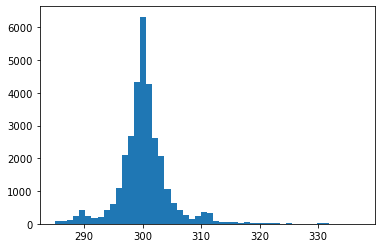

In [223]:
res = s.mask((s>s.quantile(0.99))|(s<s.quantile(0.01)))#s的大部分区间0.01到0.99
_=plt.hist(res, bins=50)#画时间间隔秒数的柱状图

3. 求如下指标对应的`Series`：
* 温度与辐射量的6小时滑动相关系数
* 以三点、九点、十五点、二十一点为分割，该观测所在时间区间的温度均值序列
* 每个观测6小时前的辐射量（一般而言不会恰好取到，此时取最近时间戳对应的辐射量）

- a

In [225]:
res = df.Radiation.rolling('6H').corr(df.Temperature)
res.tail(3)

Datetime
2016-12-31 23:45:04    0.328574
2016-12-31 23:50:03    0.261883
2016-12-31 23:55:01    0.262406
dtype: float64

- b

In [226]:
res = df.Temperature.resample('6H', origin='03:00:00').mean()#6h
res.head(3)

Datetime
2016-08-31 21:00:00    51.218750
2016-09-01 03:00:00    50.033333
2016-09-01 09:00:00    59.379310
Freq: 6H, Name: Temperature, dtype: float64

- c

In [228]:
my_dt = df.index.shift(freq='-6H')#向前6h的索引
int_loc = [df.index.get_loc(i, method='nearest') for i in my_dt]#得到最近的索引
res = df.Radiation.iloc[int_loc]
res.head(3)

Datetime
2016-09-01 00:00:08    2.58
2016-09-01 00:00:08    2.58
2016-09-01 00:00:08    2.58
Name: Radiation, dtype: float64

### Ex2：水果销量数据集

现有一份2019年每日水果销量记录表：

In [230]:
df = pd.read_csv('C:\\datawhale\\joyful-pandas-master\\data\\fruit.csv')
df.head(3)

,Date,Fruit,Sale
0,2019-04-18,Peach,15
1,2019-12-29,Peach,15
2,2019-06-05,Peach,19


1. 统计如下指标：
* 每月上半月（15号及之前）与下半月葡萄销量的比值
* 每月最后一天的生梨销量总和
* 每月最后一天工作日的生梨销量总和
* 每月最后五天的苹果销量均值

- a

In [238]:
df.Date = pd.to_datetime(df.Date)#将date转化为datetime
df_grape = df.query("Fruit == 'Grape'")#取出葡萄
res = df_grape.groupby([np.where(df_grape.Date.dt.day<=15,'First', 'Second'),df_grape.Date.dt.month])['Sale'].mean().to_frame().unstack(0).droplevel(0,axis=1)
#分组有两个条件，第一个依据天数小于大于15分为first与second，第二个依据月份
res.head(3)

,First,Second
Date,,
1,66.349462,56.467742
2,59.447059,61.355828
3,57.502890,60.443396


In [239]:
res = (res.First/res.Second).rename_axis('Month')
res.head(3)

Month
1    1.174998
2    0.968890
3    0.951351
dtype: float64

- b

In [240]:
df[df.Date.dt.is_month_end].query("Fruit == 'Pear'").groupby('Date').Sale.sum().head()#月末，梨子销量

Date
2019-01-31    847
2019-02-28    774
2019-03-31    761
2019-04-30    648
2019-05-31    616
Name: Sale, dtype: int64

- c

In [242]:
df[df.Date.isin(pd.date_range('20190101', '20191231',freq='BM'))].query("Fruit == 'Pear'").groupby('Date').Sale.sum().head()

Date
2019-01-31    847
2019-02-28    774
2019-03-29    510
2019-04-30    648
2019-05-31    616
Name: Sale, dtype: int64

- d

In [246]:
target_dt = df.drop_duplicates().groupby(df.Date.drop_duplicates().dt.month)['Date'].nlargest(5).reset_index(drop=True)#取出每个月最后五天
res = df.set_index('Date').loc[target_dt].reset_index().query("Fruit == 'Apple'")#取出苹果
res = res.groupby(res.Date.dt.month)['Sale'].mean().rename_axis('Month')#根据每个月分类
res.head(3)

Month
1    65.313725
2    54.061538
3    59.325581
Name: Sale, dtype: float64

2. 按月计算周一至周日各品种水果的平均记录条数，行索引外层为水果名称，内层为月份，列索引为星期。

In [251]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
week_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
group1 = df.Date.dt.month_name().astype('category').cat.reorder_categories(month_order, ordered=True)#月名字转化成类别对象
group1.head(2)

0       April
1    December
Name: Date, dtype: category
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [252]:
group2 = df.Fruit
group3 = df.Date.dt.dayofweek.replace(dict(zip(range(7),week_order))).astype('category').cat.reorder_categories(week_order, ordered=True)

In [255]:
res = df.groupby([group1, group2,group3])['Sale'].count().to_frame().unstack(0).droplevel(0,axis=1)#删除0列索引
res.head()

Date        January  February  March  April  May  June  July  August  \
Fruit Date                                                             
Apple Mon        46        43     43     47   43    40    41      38   
      Tue        50        40     44     52   46    39    50      42   
      Wed        50        47     37     43   39    39    58      43   
      Thu        45        35     31     47   58    33    52      44   
      Fri        32        33     52     31   46    38    37      48   

Date        September  October  November  December  
Fruit Date                                          
Apple Mon          59       42        39        45  
      Tue          40       57        47        47  
      Wed          35       46        47        38  
      Thu          36       63        37        40  
      Fri          34       37        46        41

3. 按天计算向前10个工作日窗口的苹果销量均值序列，非工作日的值用上一个工作日的结果填充。

In [258]:
df_apple = df[(df.Fruit=='Apple')&(~df.Date.dt.dayofweek.isin([5,6]))]#工作日的苹果
s = pd.Series(df_apple.Sale.values,index=df_apple.Date).groupby('Date').sum()
res = s.rolling('10D').mean().reindex(pd.date_range('20190101','20191231')).fillna(method='ffill')#滑动平均后填充非工作日
res.head()

2019-01-01    189.000000
2019-01-02    335.500000
2019-01-03    520.333333
2019-01-04    527.750000
2019-01-05    527.750000
Freq: D, dtype: float64